# Algorithme de calcul Monte Carlo

## Calcul de $\pi$

Fonction permettant de calculer sur le tirage est dans le cercle et renvoie True si les nombre sont dans le cercle et False sinon:

In [23]:
def est_dans_cercle(a, b, R):
    if (a*a + b*b) <= R**(1/2):
        return True
    else:
        return False

Test de la fonction:

In [24]:
a = 1
b = 0.5
r = 1

resultat = est_dans_cercle(a, b, r)
print(resultat)

False


Calcul de $\pi$ en utilisant une méthode de calul Monte Carlo, c'est à dire basée sur le tirage de nombres aléatoires:

In [25]:
from random import random

surface_cercle = 0
tirages = 10000

for i in range(0, tirages):
    R1 = random()
    R2 = random()

    if est_dans_cercle(R1, R2, 1):
        surface_cercle += 1
print("La valeur de \u03C0 calculée avec %.0f tirages est %f"%(tirages, (4*surface_cercle)/tirages))

La valeur de π calculée avec 10000 tirages est 3.149200


Visualisation de l'amélioration de la détermination de $\pi$ avec le nombre de tirages 

In [26]:
import numpy as np
import time

R1 = np.zeros(tirages)
R2 = np.zeros(tirages)
pi_i_quart=np.zeros(tirages)
err_pi_quart = np.zeros(tirages)
t_calcul_quart = np.zeros(tirages)
start_calcul = time.time()

surface_cercle = 0
# Calcul simple
for i in range(0, tirages):
    R1[i] = random()
    R2[i] = random()

    if est_dans_cercle(R1[i], R2[i], 1):
        surface_cercle += 1
    if i > 0:    
       pi_i_quart[i] = 4*surface_cercle/i
       err_pi_quart[i] = (abs(np.pi-pi_i_quart[i])/np.pi)
       t_calcul_quart[i] = time.time() - start_calcul
    

        

Amélioration de la valeur de $\pi$:


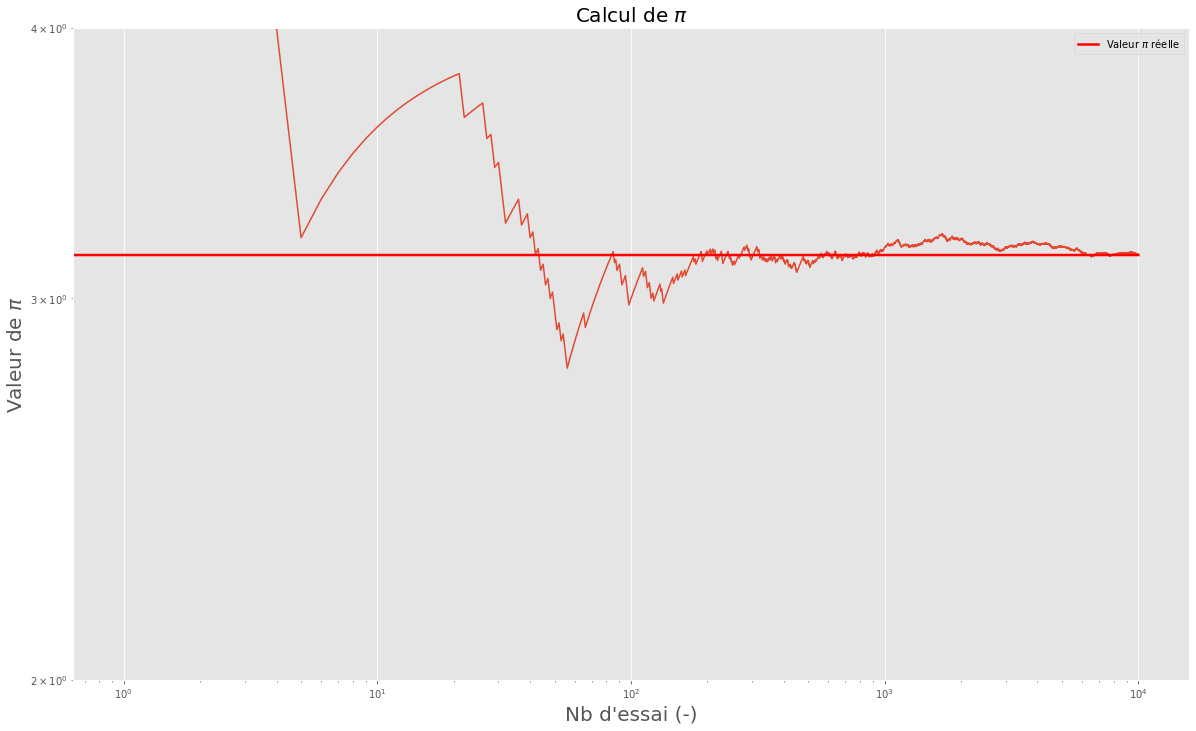

In [27]:
import pylab as pl
import matplotlib.pyplot as plt

x = [i for i in range(tirages)]
PI = [np.pi for i in range(tirages)]

pl.figure(figsize=(20, 12))
plt.plot(x, pi_i_quart)
plt.plot(x, PI, color='red', linewidth=2.5, label="Valeur $\pi$ réelle")
plt.title("Calcul de $\pi$", fontsize=20)
plt.xlabel("Nb d'essai (-)", fontsize=20)
plt.ylabel("Valeur de $\pi$", fontsize=20)
plt.ylim(2,4)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

Visualisation de l'amélioration de l'erreur relative par rapport à la valeur réelle de $\pi$ avec des limites à $10^{-4}$ et $10^{-5}$

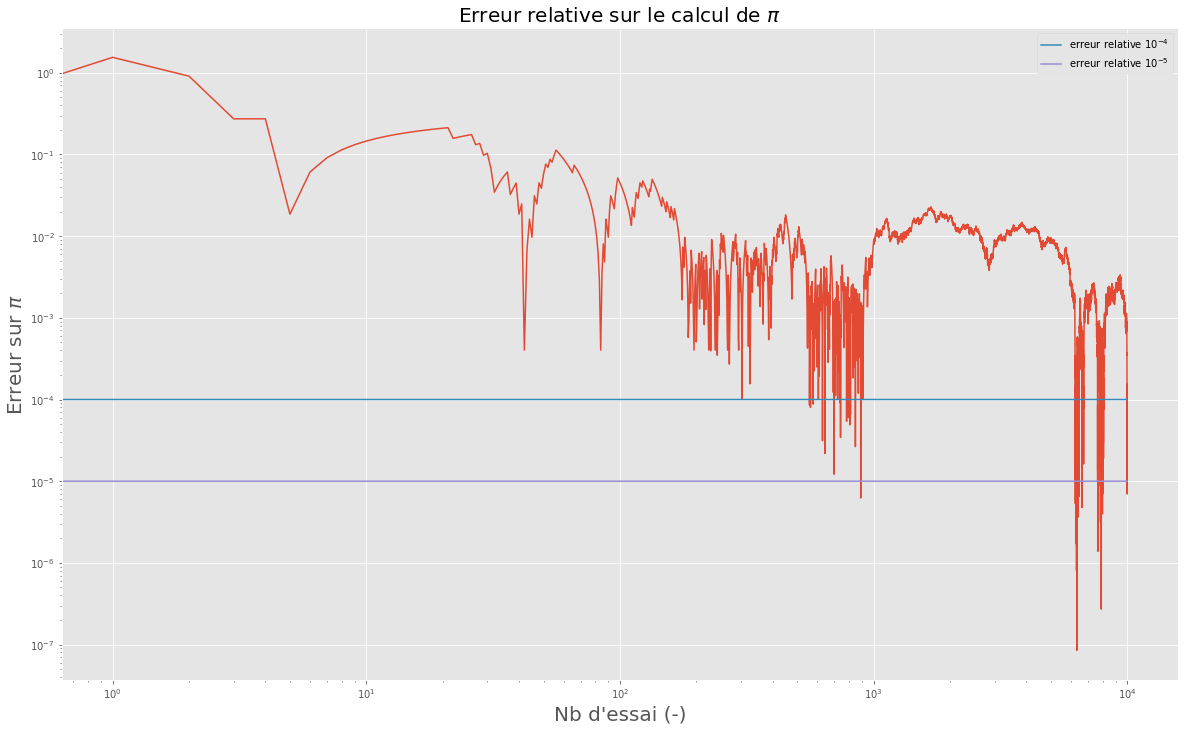

In [28]:
limite_4 = [pow(10, -4) for i in range(tirages)] # limites à 10^{-4}
limite_6 = [pow(10, -5) for i in range(tirages)] # limites à 10^{-6}

pl.figure(figsize=(20, 12))
plt.plot(x, err_pi_quart)
plt.plot(x, limite_4, label="erreur relative $10^{-4}$")
plt.plot(x, limite_6, label="erreur relative $10^{-5}$")
plt.title("Erreur relative sur le calcul de $\pi$", fontsize=20)
plt.xlabel("Nb d'essai (-)", fontsize=20)
plt.ylabel("Erreur sur $\pi$", fontsize=20)
#plt.ylim(0,0.1)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()


Temps de calcul

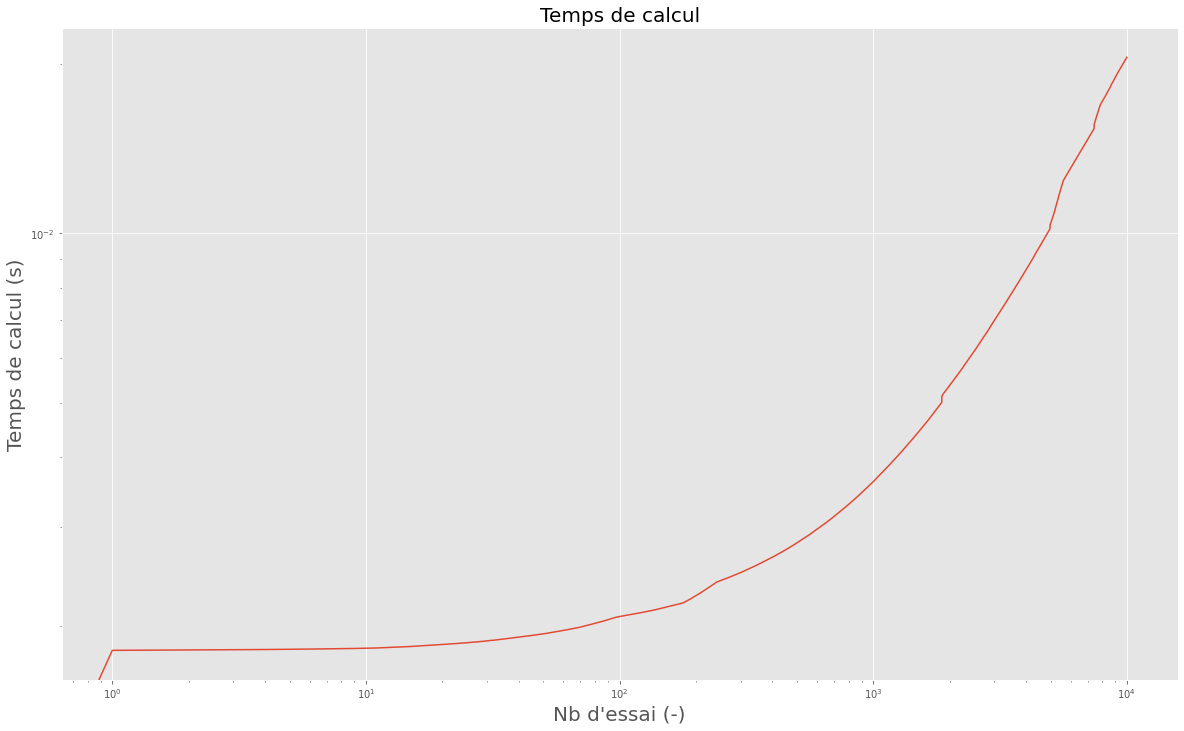

In [29]:
pl.figure(figsize=(20, 12))
plt.plot(x, t_calcul_quart)
plt.title("Temps de calcul", fontsize=20)
plt.xlabel("Nb d'essai (-)", fontsize=20)
plt.ylabel("Temps de calcul (s)", fontsize=20)
plt.yscale("log")
plt.xscale('log')
plt.show()

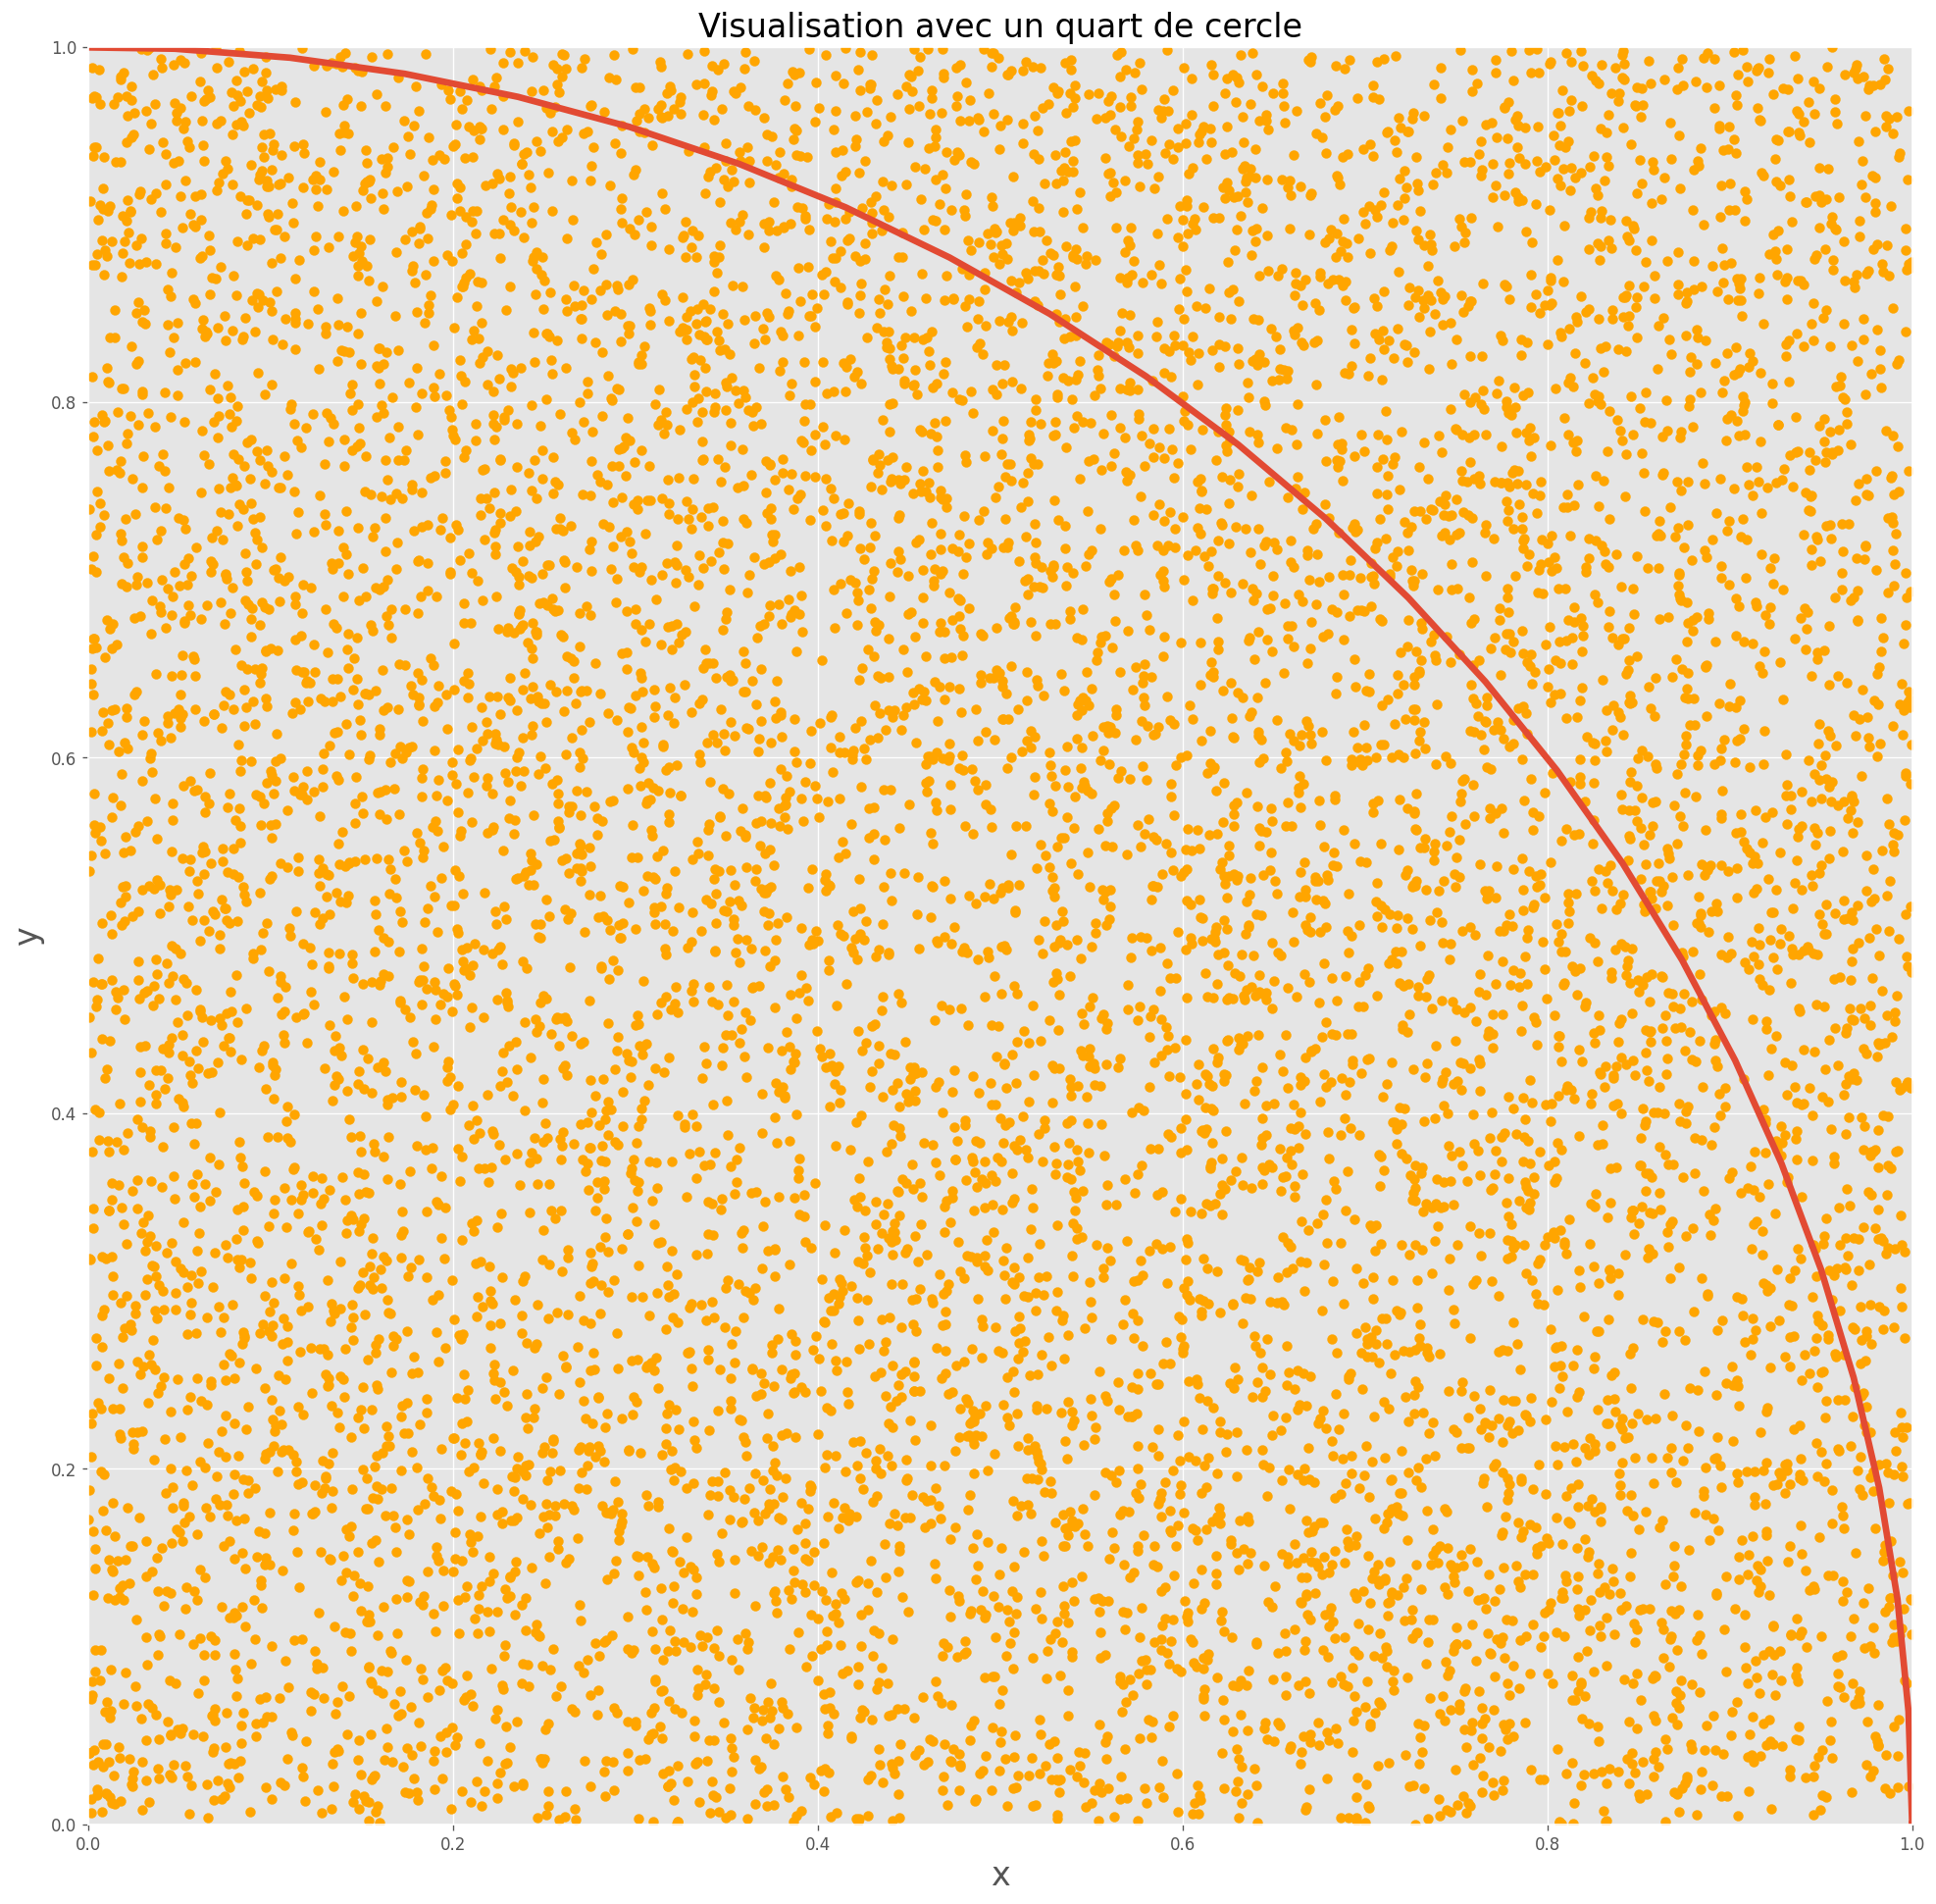

In [30]:
# Calcul du cercle 
theta = np.linspace(0, 2*np.pi, 100)
r = 1
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)


fig = plt.figure(figsize=(20,20),dpi=120)
plt.plot(x1, x2, linewidth=4)
plt.title("Visualisation avec un quart de cercle", fontsize=20)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("x", fontsize=20) 
plt.ylabel("y", fontsize=20)
plt.scatter(R1, R2, color="orange", linewidth=0.2)



Nouvelle estimation de $\pi$ avec estimation statistique avec répétition des lancer:

In [31]:
cercle = 0
tirage_1 = 0
tirage_2 = 0
nombre_tirages = 1000000
repetition = 1000

pi_result = np.zeros(repetition)
pi_error = np.zeros(repetition)


for i in range(0, repetition):
    cercle = 0
    for j in range(0, nombre_tirages):
        tirage_1 = random()
        tirage_2 = random()
            
        if est_dans_cercle(tirage_1, tirage_2, 1):
            cercle += 1
        
    pi_result[i] = 4*cercle/nombre_tirages

print("Estimation de pi : %f +- %f"%(pi_result.mean(), pi_result.std()))



Estimation de pi : 3.141629 +- 0.001692


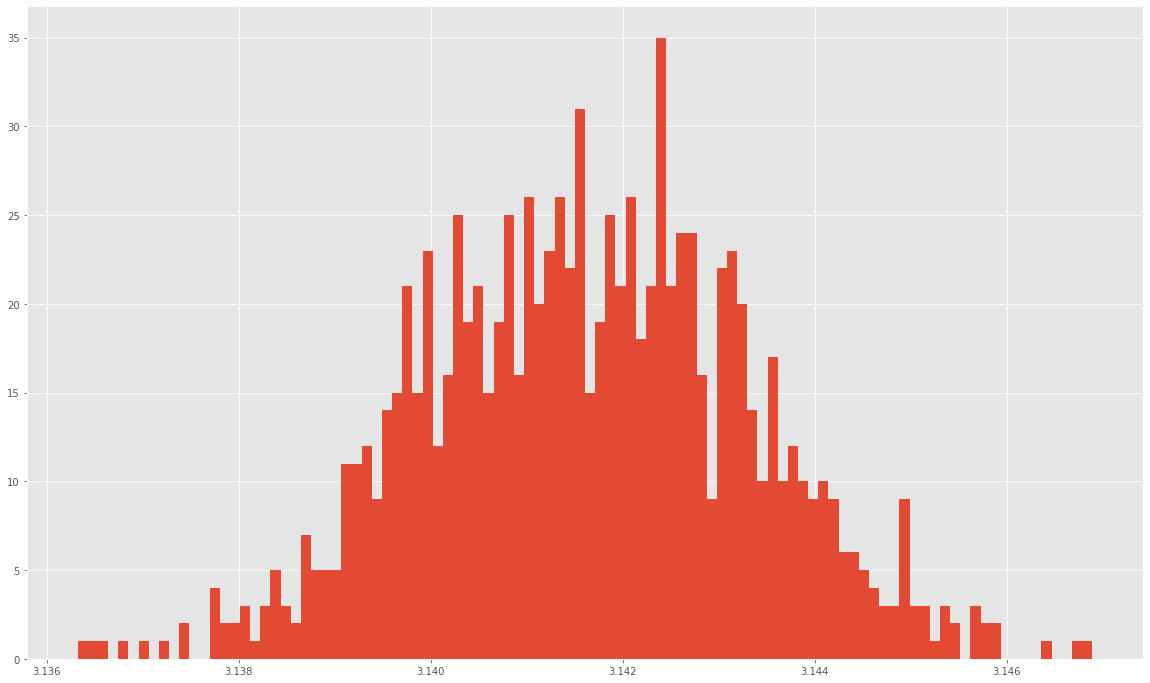

In [32]:
pl.figure(figsize=(20, 12))
plt.hist(pi_result, 100)
plt.show()


## Modélisation d'une source isotrope 

## Distance d'interaction

On souhaite dans cette partie faire des simulations Monte Carlo des distances d'interaction des photons dans la matière (dans une cuve à eau). On utilise pour ça 2 techniques:

* La méthode élémentaire
* La méthode d'inversion de la fonction de répartition





**Méthode d'inversion de la fonction de répartition**



Définitions des fonctions et des classes pour les calculs:

In [45]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def fonction(x, A, B):
    return A*np.exp(-B*x)


def Chi2_test(data, fit, err):
    chi2 = 0
    ndf = 0
    for i in range(len(data)):
        chi2 += pow((data[i] - fit[i])/(err[i]+1), 2)
        ndf += 1
    return chi2, ndf-1

# Classe pour utilisation et analyse des données
class Set_data:
    def __init__(self, energy, energy_name):
        self.energy = energy
        self.energy_name = energy_name
        self.x = None
        self.distance_int = None
        self.data_entries = None
        self.data_err = None
        self.binscenters = None
        self.parameters = None
        self.fit_exp = None
        self.chi2 = None
        self.ndf = None

    def get_chi2(self):
        return self.chi2, self.ndf
    
    def get_mu(self):
        return self.parameters[1]

    def set_distance_int(self, distance_int):
        self.distance_int = distance_int

    def fit(self):
        self.x = np.linspace(0, max(self.distance_int),
                             int(np.sqrt(len(self.distance_int))))
        self.data_entries, self.bins_1 = np.histogram(
            self.distance_int, bins=self.x)
        self.data_err = self.data_entries/np.sqrt(self.data_entries+0.001)
        self.binscenters = np.array(
            [0.5 * (self.x[i] + self.x[i+1]) for i in range(len(self.x)-1)])
        self.parameters, self.covariance = curve_fit(
            fonction, self.binscenters, self.data_entries)
        self.fit_exp = fonction(self.x, self.parameters[0], self.parameters[1])
        self.chi2, self.ndf = Chi2_test(
            self.data_entries, self.fit_exp, self.data_err)

    def affiche(self):
        print("Nom:", self.energy_name)
        print(self.data_entries)
        print(self.data_err)
        print("Chi2 :", Chi2_test(self.data_entries, self.fit_exp, self.data_err))

    def plot(self):
        plt.bar(self.binscenters, self.data_entries,
                width=self.x[1] - self.x[0], color='navy', label=self.energy_name)
        plt.plot(self.x, self.fit_exp, label='fit : $x_0 e^{-\mu x}$ \n$x_0$ = %4.1f \n$\mu_{%s}$ = %4.4f \n$\chi^{2} /ndf$ = %4.1f/%4.0f' %(self.parameters[0], self.energy_name, self.parameters[1], self.chi2, self.ndf), color='red')
        plt.xlabel("Distance (cm)")
        plt.ylabel("Count")
        plt.legend(loc=1, prop={'size': 16})

On commence par importer les librairies nécessaire, les variables, constantes, l'extraction des données utilisées et l'interpolation des données:

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import uniform

Nb = 1000
distance_int = np.zeros((4, Nb))
R = np.zeros((4, Nb))
rho_eau = 1

# Extraction des données
Data = pd.read_excel('eau.xlsx', sheet_name="Feuil1")
Energy = Data['Energy (MeV)'].values
Att = Data['µ/ρ (cm2/g)'].values
En = Data['µen/ρ (cm2/g)'].values

# Interpolation aux valueurs d'énergies d'intérêt
E_int = np.array([0.017, 0.064, 0.1, 10])
E_int_name = np.array(["17 keV", "64 keV", "100 keV", "10 MeV"])
muatt_int = np.interp(E_int, Energy, Att) 
muen_int = np.interp(E_int, Energy, En)

On réalise le tirage des nombres aléatoire et le calcul des distances:

In [47]:
for energy in range(0, 4):
    for i in range(Nb):
        R[energy][i] = uniform(0, 1)
        distance_int[energy][i] = -(rho_eau/muatt_int[energy]) * np.log(R[energy][i]) 

On définis les différents objets à l'aide de la classe Set_data qui représentent les données. Puis on réalise le fit sur les données avec un fit exponentiel avec la fonction curve_fit de Numpy. Ce fit en exponentiel nous permet d'obtenir la valeur du coefficient d'atténuation des photons calculée grâce à la méthode Monte Carlo:

In [53]:
data1 = Set_data(energy=0.017, energy_name='17 keV')
data1.set_distance_int(distance_int[0])
data1.fit()
data2 = Set_data(energy=0.064, energy_name='64 keV')
data2.set_distance_int(distance_int[1])
data2.fit()
data3 = Set_data(energy=0.1, energy_name='100 keV')
data3.set_distance_int(distance_int[2])
data3.fit()
data4 = Set_data(energy=10, energy_name='10 MeV')
data4.set_distance_int(distance_int[3])
data4.fit()

<ipython-input-45-93fad45cf6ce>:6: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-B*x)


On trace l'histogramme des distances d'interactions calculées précédemment. On représente le fit exponentiel sur les données:

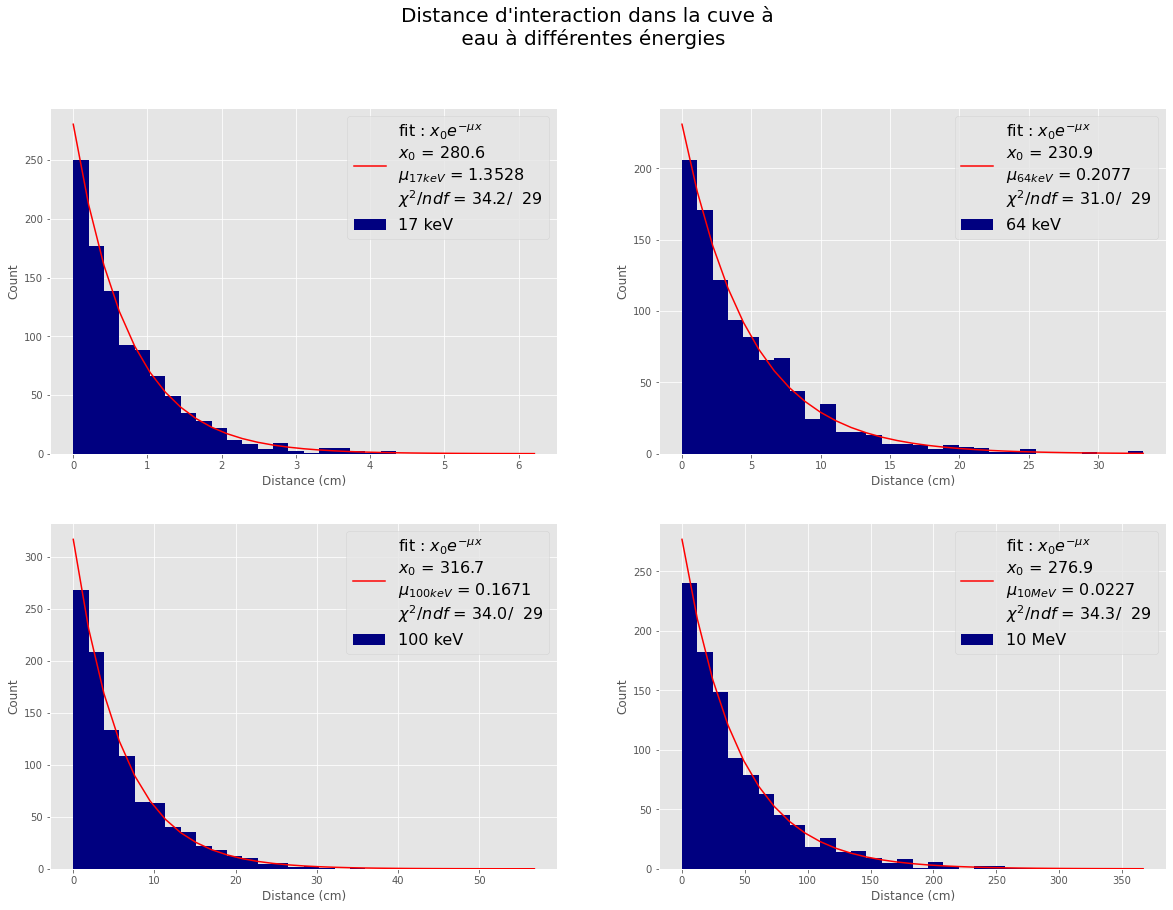

In [54]:
plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
plt.suptitle("Distance d'interaction dans la cuve à \n eau à différentes énergies", fontsize=20)
data1.plot()
plt.subplot(2, 2, 2)  
data2.plot()
plt.subplot(2, 2, 3)  
data3.plot()
plt.subplot(2, 2, 4)  
data4.plot()
plt.show()

In [52]:
print("Ecart valeur réelle à 17 keV: ", 100*abs(muatt_int[0]-data1.get_mu())/muatt_int[0], "%")
print("Ecart valeur réelle à 64 keV: ", 100*abs(muatt_int[1]-data2.get_mu())/muatt_int[1], "%")
print("Ecart valeur réelle à 100 keV: ", 100*abs(muatt_int[2]-data3.get_mu())/muatt_int[2], "%")
print("Ecart valeur réelle à 10 MeV: ", 100*abs(muatt_int[3]-data4.get_mu())/muatt_int[3], "%")

Ecart valeur réelle à 17 keV:  1.8928561243513176 %
Ecart valeur réelle à 64 keV:  3.091155054087155 %
Ecart valeur réelle à 100 keV:  2.1010585005790556 %
Ecart valeur réelle à 10 MeV:  2.2442383723459893 %


Les valeurs obtenues sont assez proches des valeurs directement données dans les tables des coefficients d'atténuation

## Type d'interaction 

Dans cette partie on souhaite déterminer, à partir de la génération de nombres aléatoires, le type d'interaction lorsqu'un photon interagit dans la matière (ici de l'eau). Pour ça on va faire le calcul à l'aides des coefficients d'atténuation des photons. La probabilité d'interaction d'un photon dans un élément dx est donné par:

$$ dP = \mu dx $$

On va donc tirer un nombre aléatoire et suivant les valeurs obtenues on va avoir un type d'interaction donné. On tire un nombre aléatoire R compris entre 0 et 1. Les conditions sur ce nombre aléatoire R vont être directement reliées aux probabilité d'interaction des photons dans la matière donc au coefficient d'atténuation:

*Si $R  \in [0; \frac{\mu_{Rayleigh}}{\mu_{tot}}]$ alors on a une diffusion Rayleigh

*Si $R  \in [\frac{\mu_{Rayleigh}}{\mu_{tot}}; \frac{\mu_{photoélectrique} + \mu_{Rayleigh}}{\mu_{tot}}]$ alors on a un effet photoélectrique

*Si $R  \in [\frac{\mu_{photoélectrique}+\mu_{Rayleigh}}{\mu_{tot}}; \frac{\mu_{photoélectrique} + \mu_{Rayleigh} + \mu_{Compton}}{\mu_{tot}}]$ alors on a une diffusion Compton

*Si $R  > \frac{\mu_{photoélectrique} + \mu_{Rayleigh} + \mu_{Compton}}{\mu_{tot}} $ alors on a une création de paire

On place une conditions supplémentaire sur la création de paire. En effet elle n'est possible que si l'énergie est suffisante est donc: $E > 1.022 MeV $. On commence par la définitions des constantes et des variables:


In [35]:
import matplotlib.pyplot as plt
import numpy as np
from random import uniform


# Constantes 
Nb = 100000
mu_rho_Rayleigh = [0.1134, 0.01236, 0.005338, 0.000000561]
mu_rho_photo_elec = [0.9144, 0.01206, 0.002762, 0.0000001386]
mu_rho_compton = [0.1733, 0.1752, 0.1625, 0.01704]
mu_rho_pair = [0, 0, 0, 0.004699]
mu_rho_tot = [mu_rho_Rayleigh[i] + mu_rho_compton[i] + mu_rho_pair[i] + mu_rho_photo_elec[i] for i in range(4)]
E_int = np.array([0.017, 0.064, 0.1, 10])
E_int_name = np.array(["17 keV", "64 keV", "100 keV", "10 MeV"])


# Variables
Nb_photo = np.zeros(4)
Nb_compton = np.zeros(4)
Nb_paire = np.zeros(4)
Nb_Ray = np.zeros(4)
R_1 = np.zeros(4)

Tirage des nombres aléatoires:

In [36]:
for energy in range(4):
    for i in range(Nb):  
        #R_1[energy] = uniform(0, 1)
        R_2 = uniform(0, 1)
        if (R_2 < mu_rho_Rayleigh[energy]/mu_rho_tot[energy]):
            Nb_Ray[energy] += 1
        if (R_2 > mu_rho_Rayleigh[energy]/mu_rho_tot[energy] and R_2 < (mu_rho_Rayleigh[energy]+mu_rho_photo_elec[energy])/mu_rho_tot[energy]):
            Nb_photo[energy] += 1
        if (R_2 > (mu_rho_Rayleigh[energy]+mu_rho_photo_elec[energy])/mu_rho_tot[energy] and R_2 < (mu_rho_compton[energy]+mu_rho_photo_elec[energy])/mu_rho_tot[energy]):
            Nb_compton[energy] += 1
        if (R_2 > (mu_rho_compton[energy]+mu_rho_photo_elec[energy]+mu_rho_Rayleigh[energy])/mu_rho_tot[energy] and E_int[energy] > 1.022):
            Nb_paire[energy] += 1


Plot des résultats dans un histogramme en bar: 

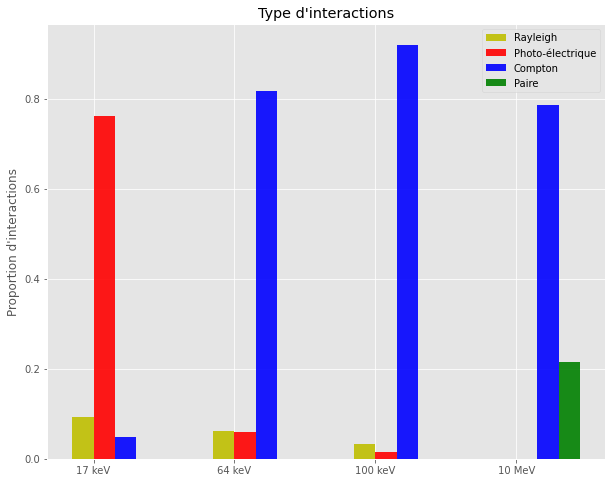

In [37]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 8))
index = np.arange(4)
bar_width = 0.15
opacity = 0.9
ax.bar(index, Nb_Ray/Nb, bar_width, alpha=opacity, color='y', label='Rayleigh')
ax.bar(index+bar_width, Nb_photo/Nb, bar_width, alpha=opacity, color='r', label='Photo-électrique')
ax.bar(index+2*bar_width, Nb_compton/Nb, bar_width, alpha=opacity, color='b', label='Compton')
ax.bar(index+3*bar_width, Nb_paire/Nb, bar_width, alpha=opacity, color='g', label='Paire')
ax.set_title("Type d'interactions")
ax.set_ylabel("Proportion d'interactions")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(E_int_name)
ax.legend()
plt.show()

On observe que à basse énergie c'est bien l'effet photoélectrique qui domine les interactions des photons dans la matière. A plus haute énergie c'est la diffusion Compton qui domine. Puis enfin à plus haute énergie on voit apparaitre la création de paires. La diffusion Rayleigh est un processus plutôt anecdotique, notamment lorsque l'on monte en énergie. C'est bien le comportement qu'on observe sur les courbes des coefficients d'atténuation des photons dans la matière (voir courbe sur NIST XCOM, https://physics.nist.gov/cgi-bin/Xcom/xcom3_2).